# Regression Models

Let us define a random vector.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = 2 * np.random.rand(100,1)
y = 4 + 3*x * np.random.randn(100,1)

$y=\theta_{0}+\theta_{1}x_{1}+\theta_{2}x_{2}+\ldots+\theta_{n}x_n$

In [8]:
#We will add theta values of ones at first to our vector of features
X_b = np.c_[np.ones((100,1)), x]
#X_b

$\theta_{best}=(X^{T}\dot X)^{-1}\dot X^{T}\dot y$

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[2.77742066],
       [1.26828947]])

## Gradient Descent step

$MSE(\theta) = \frac{2}{m}X^{T} \dot (X\dot\theta-y)$

In [36]:
eta = .2
n_iteration = 1000
m = 100

theta = np.random.randn(2,1) #random init
for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
theta

array([[ 4.68209583],
       [-0.05261779]])

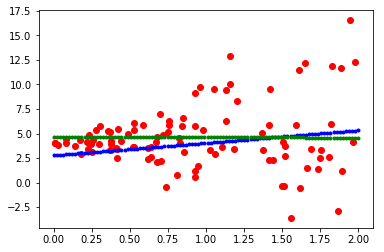

In [22]:
#fig, ax = plt.subplot()
x_new = np.linspace(0,2,100)
y_new = theta_best[0] + theta_best[1]*x_new
y_new2 = theta[0] + theta[1]*x_new
plt.plot(x,y, 'ro')
plt.plot(x_new, y_new, 'b.')
plt.plot(x_new, y_new2, 'g.')
plt.ioff()

Workshop for this left hour is to plot and also determine the values of theta with eta (learning rates) values from 0.0 through 0.2

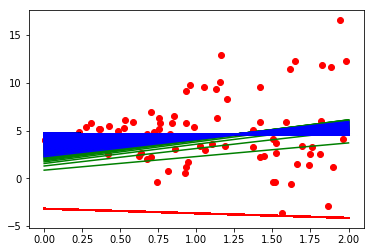

In [40]:
etas = np.linspace(0,.2,3)
n_iteration = 1000
m = 100
thetas = []
plt.plot(x,y, 'ro')
color = ['r', 'g', 'b']
for count, eta in enumerate(etas):
    theta = np.random.randn(2,1) #random init
    for iteration in range(n_iteration):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        y_new2 = theta[0] + theta[1]*x_new
        plt.plot(x_new, y_new2, color[count])

## Stochastic gradient Descent

when the cost function is very irregular, this can actually help the algoritmh jump out of local minima than the previous method does. That's why a SGC is applied.

In [23]:
n_epochs = 50
t0,t1 = 5,50 #Learning schedule hyperparameters

def learning_schedule(t):
    """Simulated anneling process"""
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta -= eta*gradients
theta

array([[ 4.69554558],
       [-0.18918572]])

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())
[sgd_reg.intercept_, sgd_reg.coef_]

[array([3.96404252]), array([0.89824191])]